In [34]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import matplotlib

matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from flipper_training.experiments.ppo.eval import get_eval_rollout, log_from_eval_rollout, PPOExperimentConfig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
figs = Path("/Users/davidkorcak/Documents/ctu/bachelors/bachelor_thesis/figures")

In [36]:
eval_cfg = Path("../cross_eval_configs/trunk_hard.yaml")
# eval_cfg = "../final_training_configs/barrier.yaml"

In [37]:
policy_path_a = "../runs/ppo/final_mixed_objective_training_666_2025-05-16_19-08-25/weights/policy_final.pth"
policy_path_b = "../runs/ppo/final_mixed_training_smoothness_thesis_42_2025-05-20/weights/policy_final.pth"

In [38]:
from copy import deepcopy

eval_config = OmegaConf.load(eval_cfg)
eval_config["seed"] = 129234
eval_config["num_robots"] = 16
eval_config["objective_opts"]["cache_size"] = 10
eval_config["max_eval_steps"] = 1000

eval_config_a = deepcopy(eval_config)
eval_config_a["policy_weights_path"] = Path(policy_path_a)
eval_config_a["vecnorm_weights_path"] = Path(policy_path_a.replace("policy", "vecnorm"))
eval_config_a = PPOExperimentConfig(**eval_config_a)

eval_config_b = deepcopy(eval_config)
eval_config_b["policy_weights_path"] = Path(policy_path_b)
eval_config_b["vecnorm_weights_path"] = Path(policy_path_b.replace("policy", "vecnorm"))
eval_config_b = PPOExperimentConfig(**eval_config_b)

In [39]:
env_a, rollout_a = get_eval_rollout(eval_config_a)
env_b, rollout_b = get_eval_rollout(eval_config_b)

2025-05-20 16:54:33,289 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703837d75c759b5c075158ced88ea318e932700dabb2 (robot_config.py:155)
2025-05-20 16:54:33,289 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703837d75c759b5c075158ced88ea318e932700dabb2 (robot_config.py:155)
2025-05-20 16:54:33,289 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703837d75c759b5c075158ced88ea318e932700dabb2 (robot_config.py:155)
Initializing start/goal position cache: 100%|██████████| 16/16 [00:00<00:00, 635.15it/s]
2025-05-20 16:54:33,325 [environment][INFO]: Environment: Comp

                      Environment Summary                       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                 Key ┃                                  Value ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    Number of robots │                                     16 │
│        Observations │            LocalStateVector, Heightmap │
│              Reward │ PotentialGoalWithPenaltiesConfigurable │
│           Objective │                          TrunkCrossing │
│   Physics frequency │                              142.86 Hz │
│   Engine iters/step │                                      4 │
│ Effective frequency │                               35.71 Hz │
└─────────────────────┴────────────────────────────────────────┘

2025-05-20 16:54:37,904 [torchrl][INFO] check_env_specs succeeded!
2025-05-20 16:54:37,915 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-20 16:54:37,915 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-20 16:54:37,915 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-20 16:54:37,921 [MLPPolicyConfig][INFO]: Loaded weights from ../runs/ppo/final_mixed_objective_training_666_2025-05-16_19-08-25/weights/policy_final.pth (mlp_policy.py:94)
2025-05-20 16:54:37,921 [MLPPolicyConfig][INFO]: Loaded weights from ../runs/ppo/final_mixed_objective_training_666_2025-05-16_19-08-25/weights/policy_final.pth (mlp_policy.py:94)
2025-05-20 16:54:37,921 [MLPPolicyConfig][INFO]: Loaded weights from ../runs/ppo/final_mixed_objective_training_666_2025-05-16_19-08-25/weights/policy_final.pth (mlp

     Policy Parameter Counts     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃        Component ┃ Parameters ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│    Actor Encoder │     32,032 │
│       Actor Head │     13,456 │
│    Value Encoder │     32,032 │
│       Value Head │     12,737 │
│              --- │        --- │
│      Total Actor │     45,488 │
│      Total Value │     44,769 │
│              --- │        --- │
│ Total Parameters │     90,257 │
└──────────────────┴────────────┘

/Users/davidkorcak/.venv/lib/python3.12/site-packages/torchrl/envs/transforms/transforms.py:6500: UserWarning: VecNorm wasn't initialized and the tensordict is not shared. In single process settings, this is ok, but if you need to share the statistics between workers this should require some attention. Make sure that the content of VecNorm is transmitted to the workers after calling load_state_dict and not before, as other workers may not have access to the loaded TensorDict.
  warnings.warn(
2025-05-20 16:54:51,177 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703837d75c759b5c075158ced88ea318e932700dabb2 (robot_config.py:155)
2025-05-20 16:54:51,177 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703

                      Environment Summary                       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                 Key ┃                                  Value ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    Number of robots │                                     16 │
│        Observations │            LocalStateVector, Heightmap │
│              Reward │ PotentialGoalWithPenaltiesConfigurable │
│           Objective │                          TrunkCrossing │
│   Physics frequency │                              142.86 Hz │
│   Engine iters/step │                                      4 │
│ Effective frequency │                               35.71 Hz │
└─────────────────────┴────────────────────────────────────────┘

2025-05-20 16:54:55,571 [torchrl][INFO] check_env_specs succeeded!
2025-05-20 16:54:55,582 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-20 16:54:55,582 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-20 16:54:55,582 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-20 16:54:55,582 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-20 16:54:55,589 [MLPPolicyConfig][INFO]: Loaded weights from ../runs/ppo/final_mixed_training_smoothness_thesis_42_2025-05-20/weights/policy_final.pth (mlp_policy.py:94)
2025-05-20 16:54:55,589 [MLPPolicyConfig][INFO]: Loaded weights from ../runs/ppo/final_mixed_training_smoothness_thesis_42_2025-05-20/weights/policy_final.pth (mlp_policy.py:94)
2025-05-20 16:54:55,589 [MLPPolic

     Policy Parameter Counts     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃        Component ┃ Parameters ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│    Actor Encoder │     32,032 │
│       Actor Head │     13,456 │
│    Value Encoder │     32,032 │
│       Value Head │     12,737 │
│              --- │        --- │
│      Total Actor │     45,488 │
│      Total Value │     44,769 │
│              --- │        --- │
│ Total Parameters │     90,257 │
└──────────────────┴────────────┘

/Users/davidkorcak/.venv/lib/python3.12/site-packages/torchrl/envs/transforms/transforms.py:6500: UserWarning: VecNorm wasn't initialized and the tensordict is not shared. In single process settings, this is ok, but if you need to share the statistics between workers this should require some attention. Make sure that the content of VecNorm is transmitted to the workers after calling load_state_dict and not before, as other workers may not have access to the loaded TensorDict.
  warnings.warn(


In [40]:
log_from_eval_rollout(rollout_a)["eval/pct_succeeded"], log_from_eval_rollout(rollout_b)["eval/pct_succeeded"]

(0.5, 0.5)

In [41]:
terrain_cfg = env_a.terrain_cfg

In [42]:
trajectories_a = rollout_a["next", "curr_state"]["x"]
trajectories_b = rollout_b["next", "curr_state"]["x"]
trajectories_a, trajectories_b

(tensor[16, 707, 3] n=33936 (0.1Mb) x∈[-2.731, 3.171] μ=0.105 σ=0.946,
 tensor[16, 841, 3] n=40368 (0.2Mb) x∈[-2.484, 2.430] μ=0.021 σ=0.901)

In [43]:
z_normalized = terrain_cfg.z_grid / terrain_cfg.z_grid.max()

In [44]:
traj_a_label = "Trajectory from Uniformly Mixed Objective"
traj_b_label = "Trajectory from Smoothness Objective"

tensor[1] bool [True]
tensor[1] bool [False]
tensor[1] bool [False]
tensor[1] bool [False]
tensor[1] bool [True]
tensor[1] bool [True]
tensor[1] bool [False]
tensor[1] bool [True]
tensor[1] bool [True]
tensor[1] bool [False]
tensor[1] bool [False]
tensor[1] bool [False]
tensor[1] bool [False]
tensor[1] bool [True]
tensor[1] bool [True]
tensor[1] bool [False]


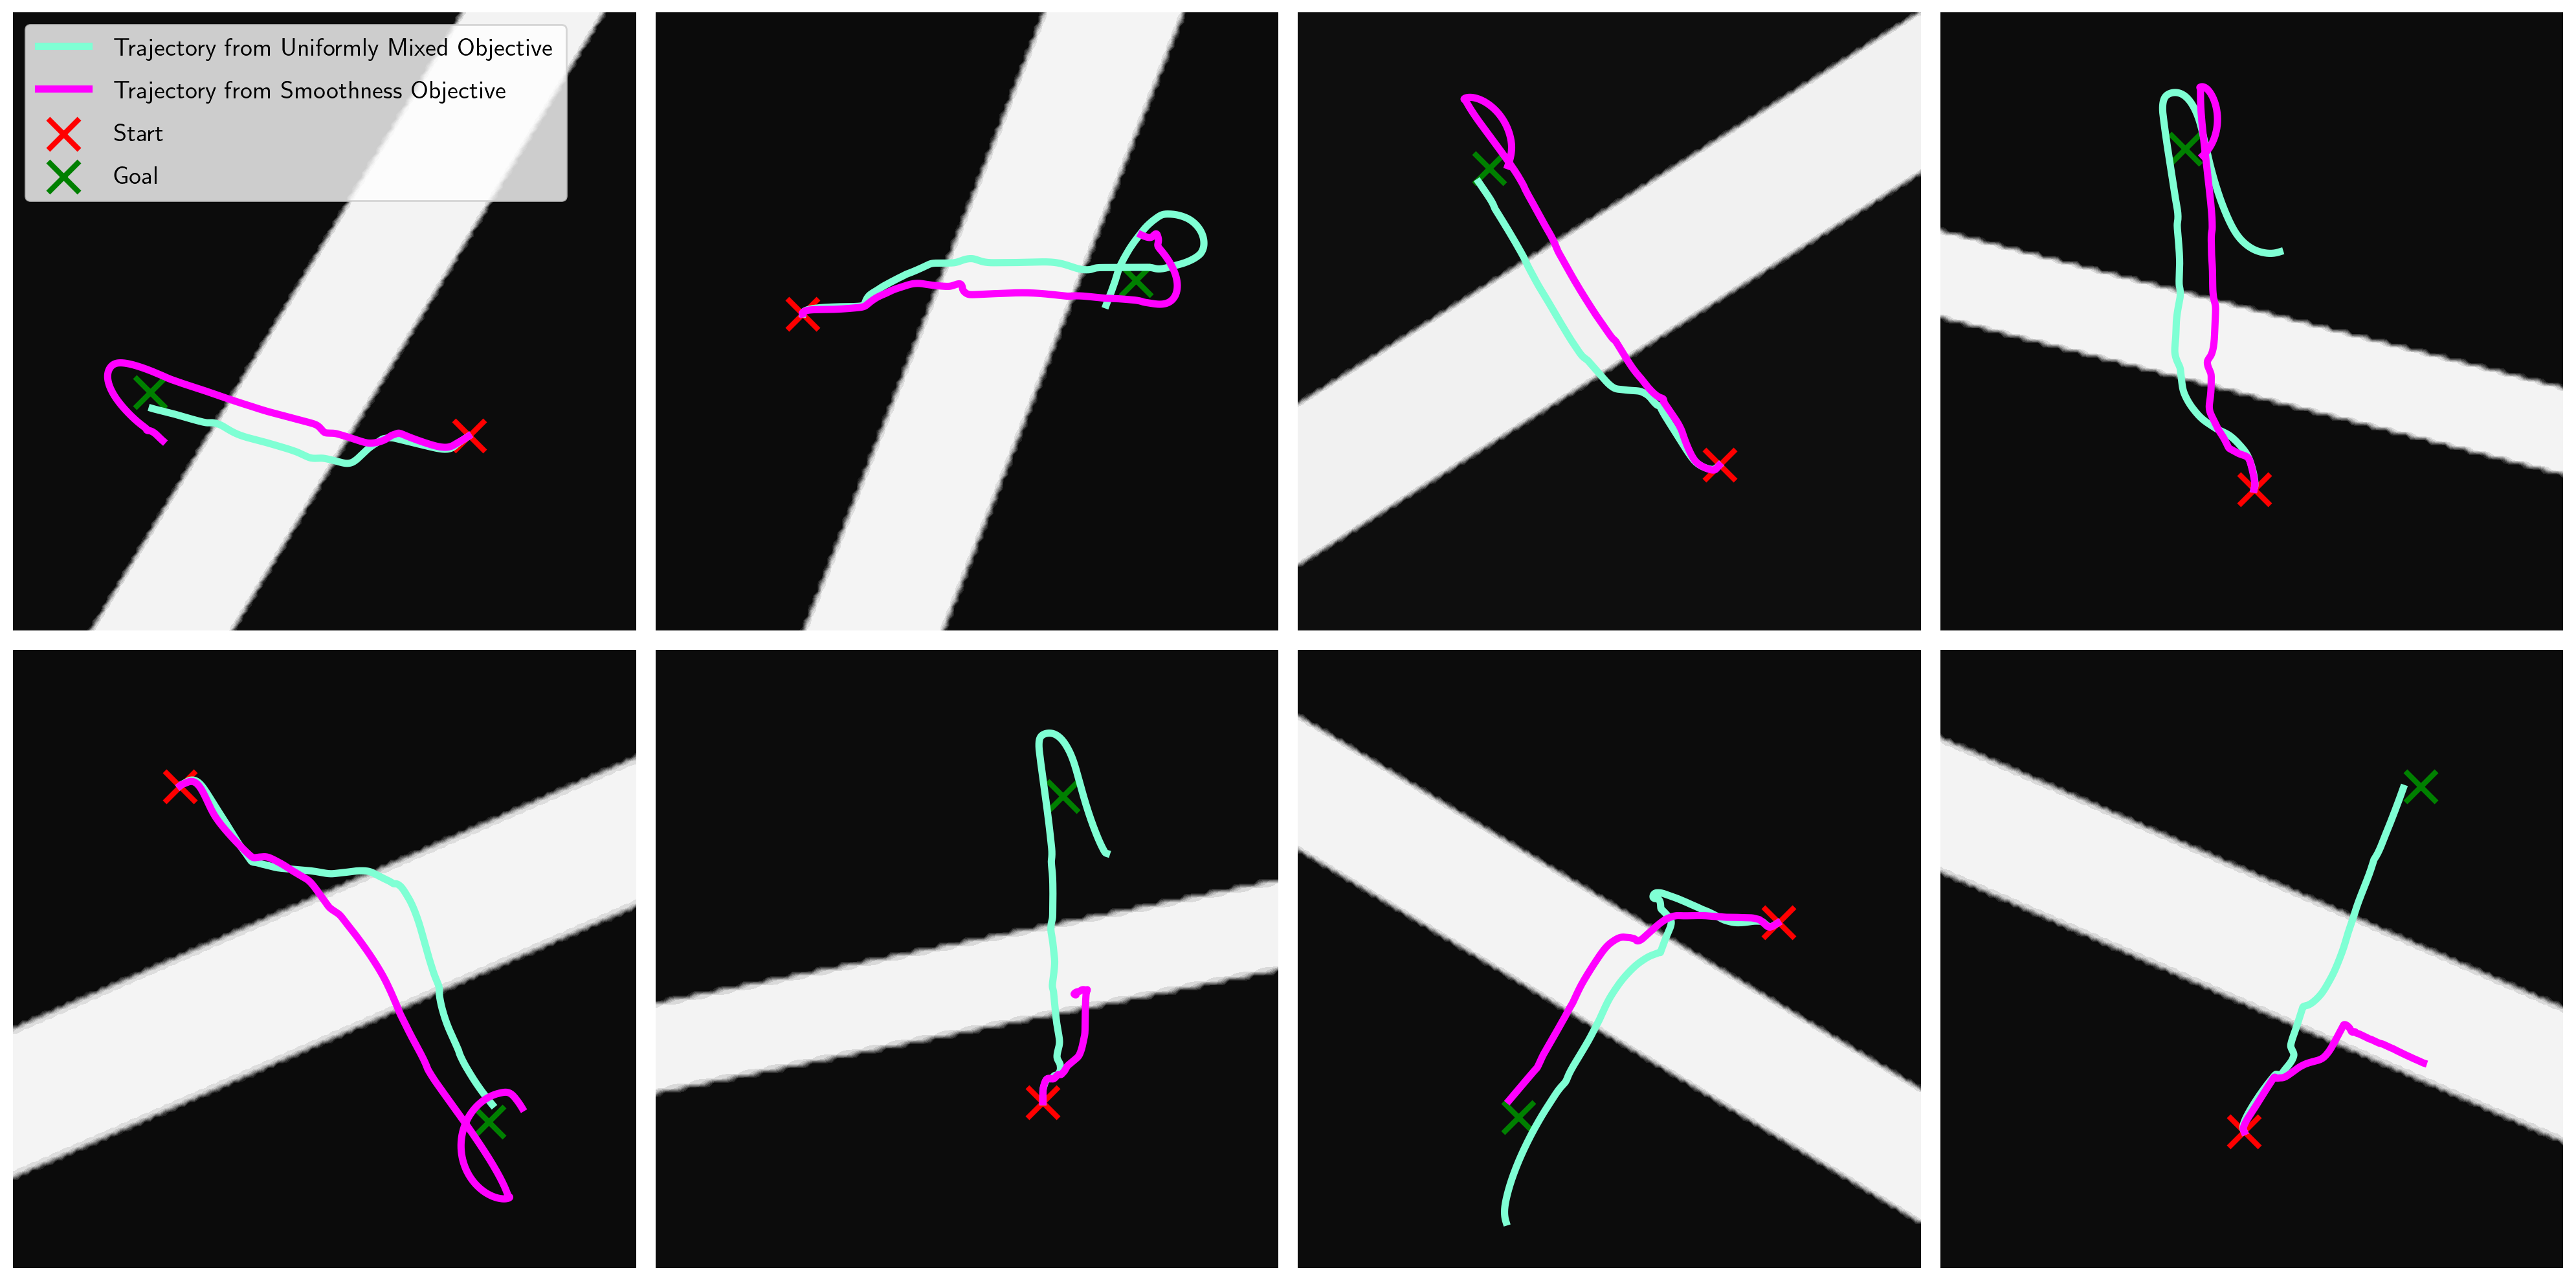

In [58]:
col = 4
row = 2
single_size = 5
indices_to_show = range(4, col * row + 4)
fig, ax = plt.subplots(row, col, figsize=(col * single_size, row * single_size), dpi=200)
if ax.ndim == 1:
    ax = ax.reshape(1, -1)
j = 0
for i in indices_to_show:
    print(rollout_a["next", "succeeded"][i, -1])
    print(rollout_b["next", "succeeded"][i, -1])
    row_idx = j // col
    col_idx = j % col
    j += 1
    start_pos = env_a.start[i].x
    goal_pos = env_a.goal[i].x
    ax[row_idx, col_idx].grid(False)
    ax[row_idx, col_idx].axis("off")
    ax[row_idx, col_idx].contourf(
        terrain_cfg.x_grid[i],
        terrain_cfg.y_grid[i],
        z_normalized[i],
        cmap="gray",
        levels=10,
    )
    not_done_a = ~rollout_a["next", "done"][i]
    traj_i = trajectories_a[i, not_done_a.squeeze(), :2]
    ax[row_idx, col_idx].plot(
        traj_i[:, 0],
        traj_i[:, 1],
        color="aquamarine",
        linewidth=4,
        label=traj_a_label,
    )
    not_done_b = ~rollout_b["next", "done"][i]
    traj_i = trajectories_b[i, not_done_b.squeeze(), :2]
    ax[row_idx, col_idx].plot(
        traj_i[:, 0],
        traj_i[:, 1],
        color="magenta",
        linewidth=4,
        label=traj_b_label,
    )
    ax[row_idx, col_idx].scatter(
        start_pos[None, 0],
        start_pos[None, 1],
        color="red",
        marker="x",
        s=300,
        label="Start",
        lw=3,
    )
    ax[row_idx, col_idx].scatter(
        goal_pos[None, 0],
        goal_pos[None, 1],
        color="green",
        marker="x",
        s=300,
        label="Goal",
        lw=3,
    )
    fig.tight_layout()

ax[0, 0].legend(
    fontsize=14,
    loc="upper left",
    borderpad=0.5,  # padding around the legend
    labelspacing=0.8,  # vertical space between entries
    handletextpad=1.0,  # space between handle and text
)

In [59]:
fig.savefig(figs / f"smooth_control_trajectory_comparison_{eval_cfg.stem}.pdf", bbox_inches="tight")